In [75]:
import pandas_datareader.data as wb
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from past.builtins import xrange


In [31]:
tech_list=['AAPL','GOOG','MSFT','AMZN','BYD']
sns.set_style('whitegrid')

In [4]:
end=datetime.now()
start=datetime(end.year-1, end.month-1, 1)

In [5]:
for stock in tech_list:
    globals()[stock]=wb.DataReader(stock,'yahoo',start,end)

In [6]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-17,194.960007,192.169998,192.899994,193.889999,14651700.0,193.889999
2019-06-18,200.289993,195.210007,196.050003,198.449997,26551000.0,198.449997
2019-06-19,199.880005,197.309998,199.679993,197.869995,21124200.0,197.869995
2019-06-20,200.610001,198.029999,200.369995,199.460007,21499900.0,199.460007
2019-06-21,200.740005,198.149994,198.800003,199.979996,13640966.0,199.979996


In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,289.000000,289.000000,289.000000,289.000000,2.890000e+02,289.000000
mean,192.726921,188.978546,190.791834,190.950865,3.174637e+07,189.226908
std,20.423068,20.178316,20.289604,20.271049,1.386234e+07,19.895791
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.039642
25%,179.119995,174.929993,175.940002,176.779999,2.228350e+07,175.260513
50%,191.570007,187.860001,189.750000,190.080002,2.821540e+07,187.840683
75%,207.809998,203.899994,205.880005,207.160004,3.719510e+07,204.280457
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


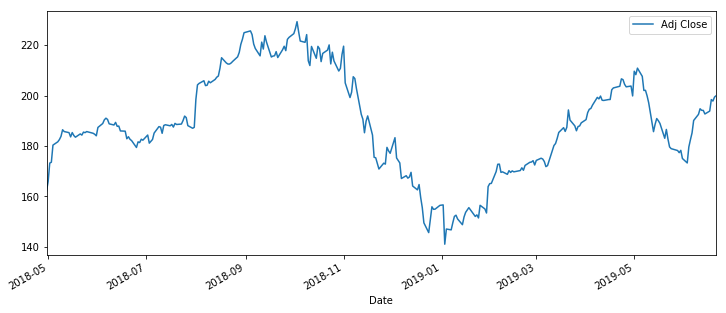

In [8]:
AAPL['Adj Close'].plot(figsize=(12,5),legend=True)

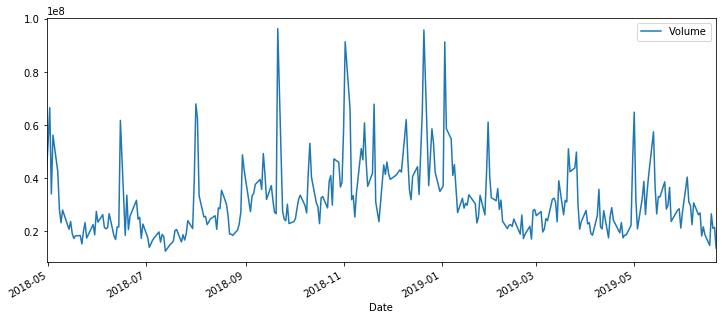

In [9]:
AAPL['Volume'].plot(figsize=(12,5),legend=True)

In [10]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name="MA for %s day period"%(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(window=ma,center=False).mean()

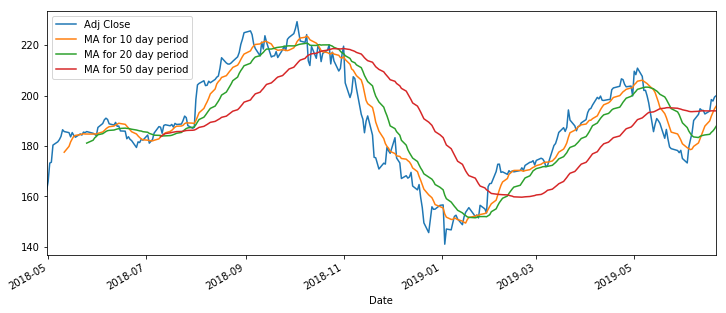

In [11]:
AAPL[['Adj Close','MA for 10 day period','MA for 20 day period','MA for 50 day period']].plot(subplots=False,figsize=(12,5))

In [66]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 day period,MA for 20 day period,MA for 50 day period,Daily Returns
Date,,,,,,,,,,
2018-04-30,167.259995,161.839996,162.130005,165.259995,42427400.0,162.156830,NaN,NaN,NaN,NaN
2018-05-01,169.199997,165.270004,166.410004,169.100006,53569400.0,165.924728,NaN,NaN,NaN,0.023236
2018-05-02,177.750000,173.800003,175.229996,176.570007,66539400.0,173.254471,NaN,NaN,NaN,0.044175
2018-05-03,177.500000,174.440002,175.880005,176.889999,34068200.0,173.568466,NaN,NaN,NaN,0.001812
2018-05-04,184.250000,178.169998,178.250000,183.830002,56201300.0,180.378143,NaN,NaN,NaN,0.039233


In [12]:
 AAPL['Daily Returns'] =AAPL['Adj Close'].pct_change()

In [13]:
 AAPL[ AAPL['Daily Returns']==AAPL['Daily Returns'].max()]

,High,Low,Open,Close,Volume,Adj Close,MA for 10 day period,MA for 20 day period,MA for 50 day period,Daily Returns
Date,,,,,,,,,,
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,155.898438,159.498083,166.851607,188.232696,0.070422


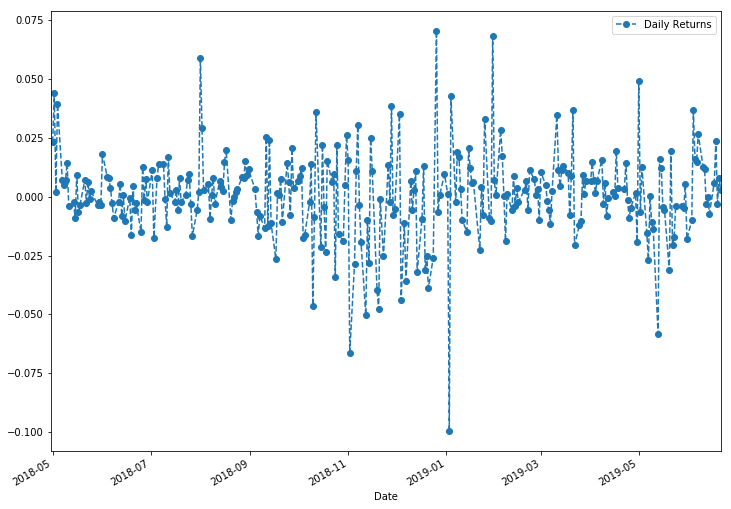

In [14]:
AAPL['Daily Returns'].plot(figsize=(12,9),legend=True,linestyle='--',marker='o')

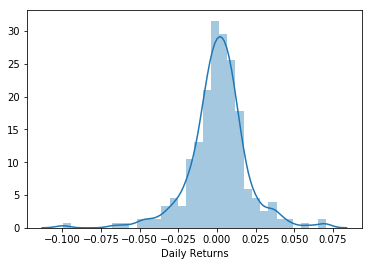

In [63]:
sns.distplot(AAPL['Daily Returns'].dropna())

In [21]:
close_df=wb.DataReader(tech_list,'yahoo',start,end)['Adj Close']

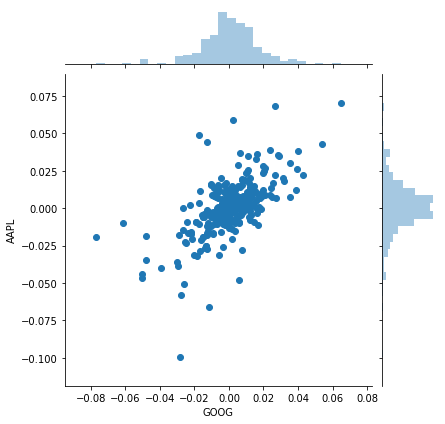

In [24]:
close_df.tail()
perc=close_df.pct_change()
sns.jointplot('GOOG','AAPL',perc,kind='scatter')

In [91]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-04-30,1037.000000,1016.849976,1030.010010,1017.330017,1671300,1017.330017
2018-05-01,1038.469971,1008.210022,1013.659973,1037.310059,1427900,1037.310059
2018-05-02,1040.389038,1022.869995,1028.099976,1024.380005,1603100,1024.380005
2018-05-03,1029.675049,1006.289978,1019.000000,1023.719971,1815100,1023.719971
2018-05-04,1048.510010,1016.900024,1016.900024,1048.209961,1938700,1048.209961


In [17]:
np.mean(x)

39.8

In [19]:
np.std(x)

23.87802336877992

In [120]:
closef=close_df.dropna()
will=closef.pct_change()

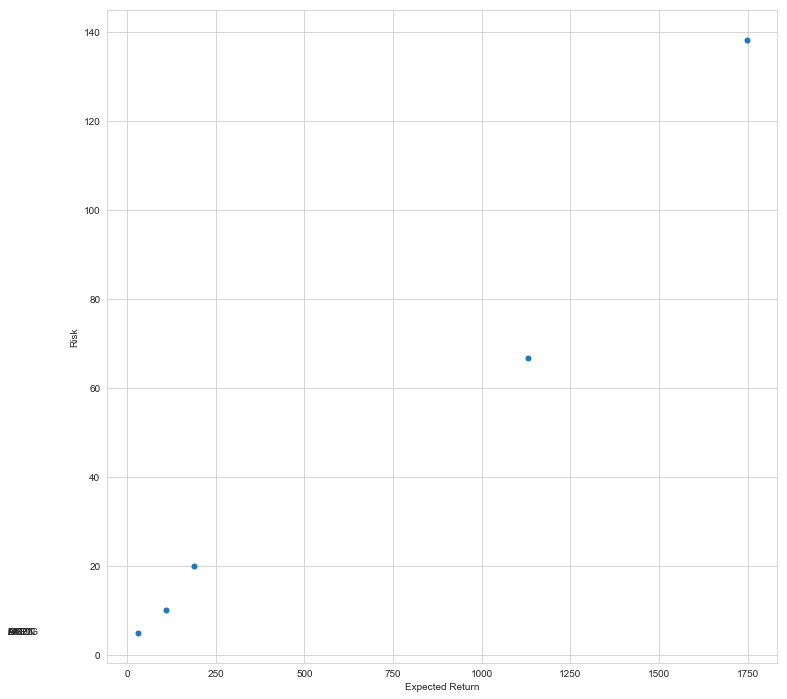

In [121]:
plt.figure(figsize=(12,12))
plt.scatter(closef.mean(),closef.std(),s=25)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label,x,y in zip(will.columns,will.mean(),will.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),textcoords = 'offset points')

In [126]:
days=365
dt=1/365
expreturn=will.mean()['GOOG']
stddev= will.std()['GOOG']

def montecarlo(start_price,days,expreturn,stddev):
    price=np.zeros(days)
    price[0]=start_price
    
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in xrange(1,days):
        shock[x]=np.random.normal(loc=expreturn*dt,scale=stddev*np.sqrt(dt))
        drift[x] =expreturn*dt
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

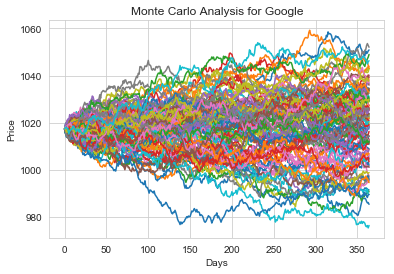

In [127]:
start_price=1017.330017


for run in xrange(100):
    plt.plot(montecarlo(start_price,days,expreturn,stddev))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')
